In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from pearce.emulator.emu import OriginalRecipe, ExtraCrispy
from pearce.emulator.trainingData import parameter, PARAMS

In [11]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from itertools import cycle
colors = cycle(sns.color_palette())

In [12]:
training_dir_jk = '/u/ki/swmclau2/des/PearceLHC'
training_dir_mr = '/u/ki/swmclau2/des/Pearce_GenObs_LHC'

In [13]:
fiducial_params = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987, 7.29722764, \
           10.24533859,  14.38449888,  20.1958975 , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2

In [14]:
y_param = 'logMmin'
emulation_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
em_params = dict(emulation_point)
del em_params[y_param]

In [15]:
y_param_idx = -1
for idx, p in enumerate(PARAMS):
    if p.name==y_param:
        y_param_idx = idx
        break
        
y_vals = np.linspace(PARAMS[y_param_idx].low, PARAMS[y_param_idx].high, 4)
em_params[y_param] = y_vals

In [16]:
or_params = PARAMS[:]
or_params.append(parameter('r', 0, 1)) #95% sure bounds aren't used for r
emu_jk = OriginalRecipe(training_dir_jk,or_params)

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/pearce/emulator/emu.py:573: UserWarning: WARNING: NaN detected. Skipping point in /u/ki/swmclau2/des/PearceLHC/cov_HOD133.npy
  warnings.warn('WARNING: NaN detected. Skipping point in %s' % cov_file)


In [17]:
rpoints = np.logspace(np.log10(rbins[0]), np.log10(rbins[-1]), 200)
log_xi_pred_jk, log_xi_cov = emu_jk.emulate_wrt_r(em_params, rpoints)
log_xi_err_jk = np.sqrt(np.diag(log_xi_cov))
log_xi_pred_jk = log_xi_pred_jk.reshape((-1, len(rpoints)))
log_xi_err_jk = log_xi_err_jk.reshape((-1, len(rpoints)))

In [18]:
emu_mr = OriginalRecipe(training_dir_mr,or_params)

In [19]:
log_xi_pred_mr, log_xi_cov = emu_mr.emulate_wrt_r(em_params, rpoints)
log_xi_err_mr = np.sqrt(np.diag(log_xi_cov))
log_xi_pred_mr = log_xi_pred_mr.reshape((-1, len(rpoints)))
log_xi_err_mr = log_xi_err_mr.reshape((-1, len(rpoints)))

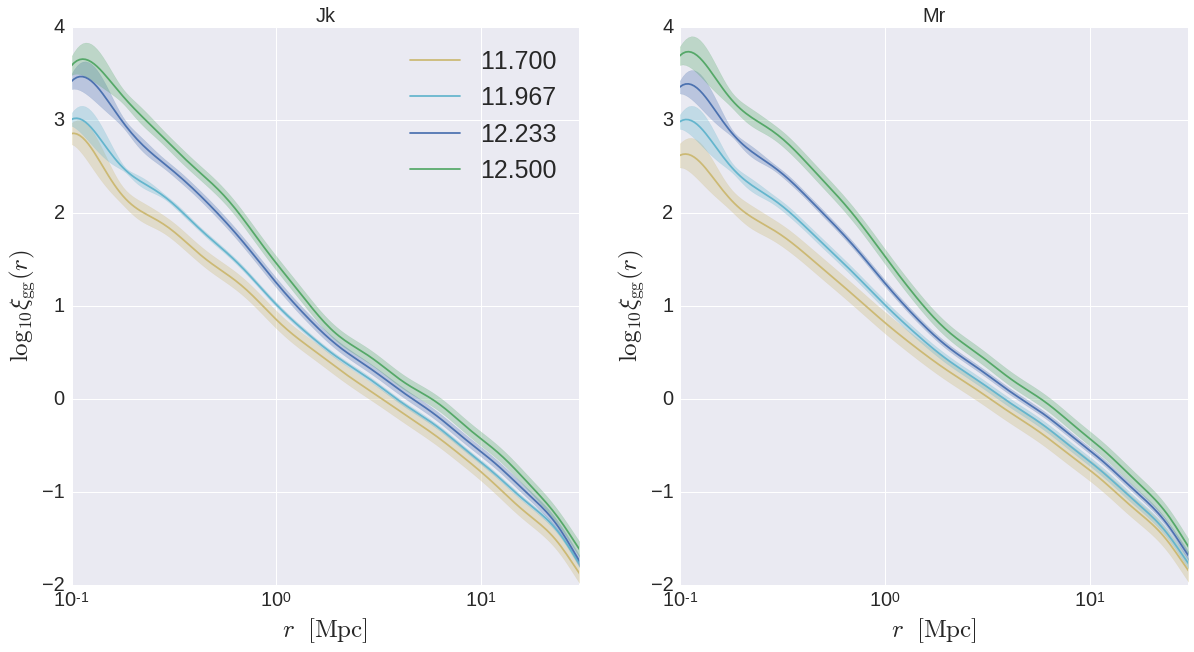

In [32]:
fig = plt.figure(figsize = (20, 10))
for label, lxp_jk, lxe_jk,lxp_mr, lxe_mr,c in zip(y_vals, log_xi_pred_jk, log_xi_err_jk,log_xi_pred_mr, log_xi_err_mr ,colors):
    plt.subplot(121)
    plt.plot(rpoints, lxp_jk,label = '%.3f'%label, color = c )

    plt.fill_between(rpoints,lxp_jk+lxe_jk,
                     lxp_jk-lxe_jk, color = c, alpha = 0.3)
    plt.subplot(122)
    plt.plot(rpoints, lxp_mr, color = c )

    plt.fill_between(rpoints,lxp_mr+lxe_mr,
                     lxp_mr-lxe_mr, color = c, alpha = 0.3)
for sp, title in zip((121, 122), ('Jk', "Mr")):
    plt.subplot(sp)
    plt.xlim(xmin = 0.1, xmax = 30)    
    plt.ylim(ymin = -2, ymax = 4)
    plt.title(title, fontsize =20)
    #plt.loglog()
    plt.xscale('log')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
    plt.ylabel(r'$\log_{10}{\xi_{\rm gg}(r) }$', fontsize=25)
    plt.legend(loc='best', fontsize=25)

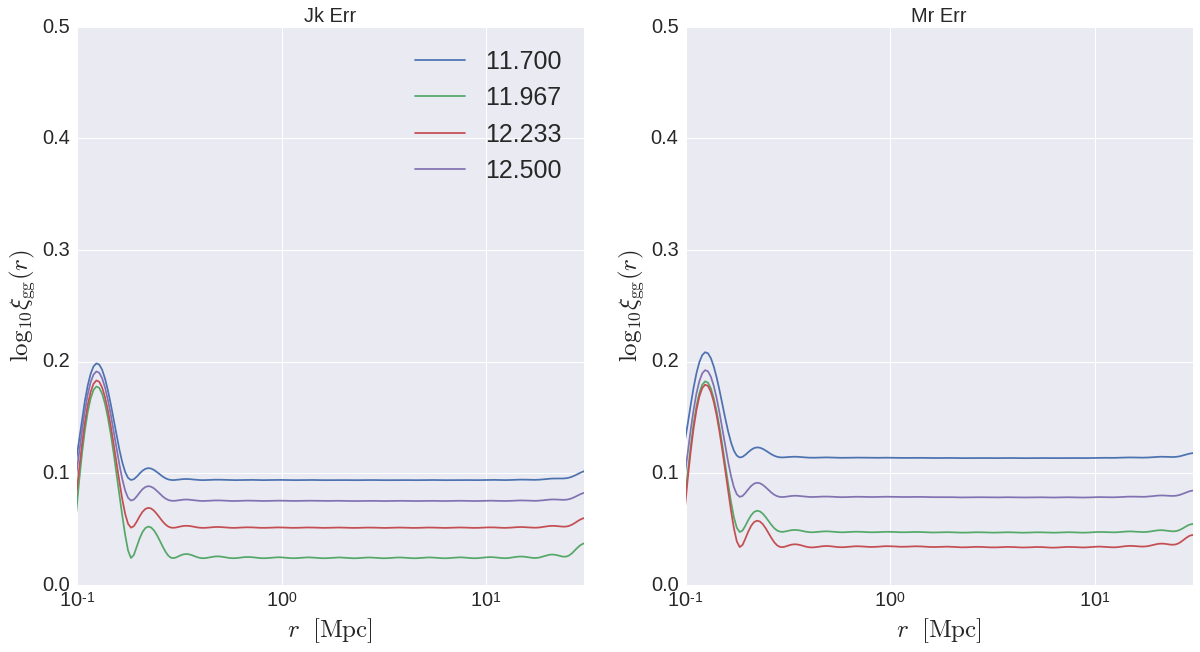

In [34]:
fig = plt.figure(figsize = (20, 10))
for label, lxp_jk, lxe_jk,lxp_mr, lxe_mr,c in zip(y_vals, log_xi_pred_jk, log_xi_err_jk,log_xi_pred_mr, log_xi_err_mr ,colors):
    plt.subplot(121)
    plt.plot(rpoints, lxe_jk,label = '%.3f'%label, color = c )
    
    plt.subplot(122)
    plt.plot(rpoints, lxe_mr, color = c )

for sp, title in zip((121, 122), ('Jk Err', "Mr Err")):
    plt.subplot(sp)
    plt.xlim(xmin = 0.1, xmax = 30)    
    plt.ylim(ymin = 0, ymax = 0.5)
    plt.title(title, fontsize =20)
    #plt.loglog()
    plt.xscale('log')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
    plt.ylabel(r'$\log_{10}{\xi_{\rm gg}(r) }$', fontsize=25)
    plt.legend(loc='best', fontsize=25)

In [30]:
truth_dir_jk = '/u/ki/swmclau2/des/PearceData_GenObs'
r2 = emu_jk.goodness_of_fit(truth_dir_jk, 100, 'r2')
r2.mean()

0.97243685167832328

In [31]:
truth_dir_mr = '/u/ki/swmclau2/des/PearceData_GenObs'
r2 = emu_mr.goodness_of_fit(truth_dir_mr,100, 'r2')
r2.mean()

0.97738820804463311